## GSE157077 –  Transcriptome of Suprachiasmatic Nucleus in C57BL/6J
- There is no much information about this dataset
- "We compared the transcriptome of Suprachiasmatic Nucleus in C57BL/6J mice fed a high-fat diet or normal chow through an entire circadian cycle: 6 time points (TP) every four hours."
- Also it is not know which group of mice is representet in this dataset, the control or high-fat diet. 


In [ ]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import custom_func as pc
import matplotlib.pyplot as plt
from pydeseq2.preprocessing import deseq2_norm

### Step 1: Open the dataset

In [13]:
path = '/Users/maksimsgolubovics/Python_VScode/Studienprojekt/rnaseq_datasets/GSE157077_rnaseq.h5ad'
adata = ad.read_h5ad(path)

#Transform to DataFrame
data_df = pd.DataFrame(data=adata.X, columns=adata.var.index, index=adata.obs.index).T

#Look at dataset
data_df.head()

/Users/maksimsgolubovics/Python_VScode/.venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ID,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
ZT_0_REP_1,3.170110,30.2045,28.4476,5.56569,13.3841,3.92896,3.35027,8.62685,22.5523,35.2107,...,1.93482,4.54886,4.23622,0.033029,21.3289,6.48222,4.72624,6.87360,0.047663,28.4922
ZT_0_REP_2,0.388454,27.6255,25.5468,4.12731,13.9533,4.39002,4.37840,9.30055,25.0449,34.5048,...,1.90856,4.63155,5.21486,0.000000,18.0985,7.41965,5.19210,7.39693,0.000000,27.5884
ZT_0_REP_3,0.211968,23.8767,23.4220,3.42432,12.4736,4.87241,5.07744,10.80600,20.7822,30.9912,...,1.95712,4.63882,4.87297,0.000000,21.8700,5.81593,6.26035,7.57146,0.044665,24.9556
ZT_4_REP_1,0.918113,30.2621,25.1362,4.80859,12.1665,4.52012,3.68748,11.34270,25.7516,34.5019,...,1.92979,5.20494,5.74621,0.009809,24.8227,6.73104,5.85731,7.12980,0.000000,31.3402
ZT_4_REP_2,0.196103,35.9204,27.8601,8.20901,15.8836,4.90051,4.52962,10.49180,27.3991,44.6959,...,1.24183,3.61730,5.19531,0.000000,15.8933,7.99687,4.29413,5.98482,0.000000,30.9738


### Step 2: Prepare the dataset

In [14]:
data_df_norm = deseq2_norm(data_df)[0]
data_df_log = np.log10(data_df_norm + 0.1) #Logarithmic transformation

### Step 3: Exploratory analysis

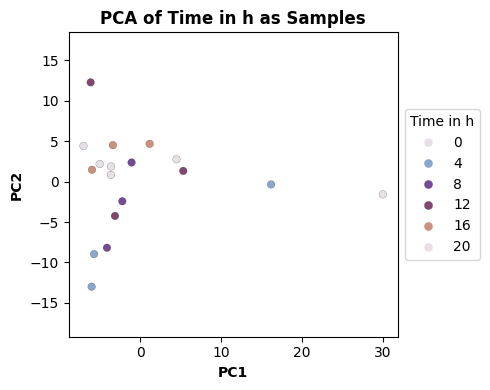

In [4]:
data_df_log_time = data_df_log.join(adata.var['time']).reset_index().set_index('time').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Time in h', c_map='twilight')

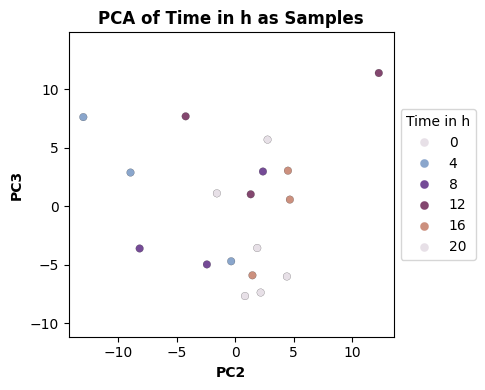

In [5]:
pc.principal_component_2d_timesample(data=data_df_log_time, x=2, y=3, label='Time in h', c_map='twilight')

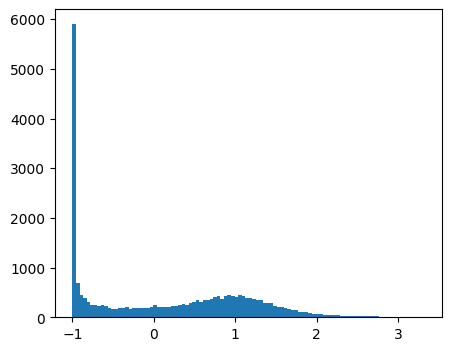

In [6]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.mean(), bins=100);

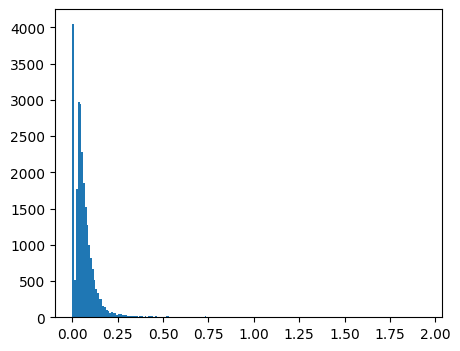

In [7]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.std(), bins=200);

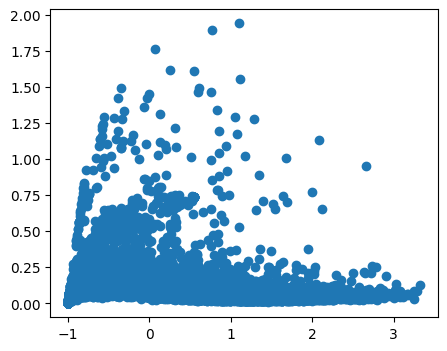

In [8]:
plt.figure(figsize=(5, 4))
plt.scatter(x=data_df_log.mean(), y=data_df_log.std());

### Step 5: COFE

In [21]:
X_train_a = data_df_log
true_time_train_a = adata.var['time'].astype(int)

X_train_a, X_test_a, features_a, features_std_a = COFE.analyse.preprocess_data(X_train_a.to_numpy(), None, 
                                                                           features=X_train_a.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=80)
X_train_a.shape # (Samples, Transcripts)

(18, 6314)

In [22]:
s_choices = np.linspace(1, 50, 15)
cv_a = COFE.analyse.cross_validate(X_train_a, s_choices, features=features_a, K=5, ncores=-1, restarts=10)

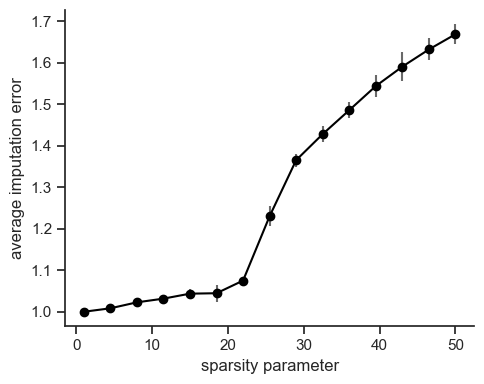

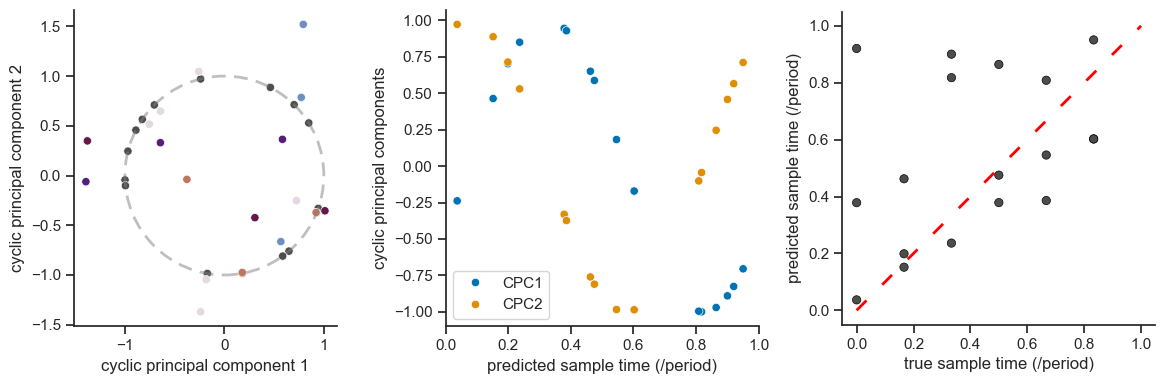

In [23]:
results_train_diet_a = COFE.analyse.predict_time(X_train_a, cv_a, true_times=true_time_train_a.to_numpy())
COFE.plot.plot_cv_run(results_train_diet_a, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_a, time=true_time_train_a.to_numpy(), X=X_train_a, figsize=(12, 4))

In [24]:
results_train_diet_a["MAPE"]*24

np.float64(3.161081407640671)

## Conclusion

There is not much to be said about this. COFE showed very predictions to a certain extent on this small dataset, but it took a while to find the “optimal” mean and scaling threshold to achieve this result(or it's a luck of local minima, so I increased 'restarts' to 10). It would be nice to have an article relating to the dataset, as it unfortunately lets imagine that the data could be of questionable quality. But such good result was still expected because it's a center of circadian clocks.